In [28]:
%config InlineBackend.figure_format = 'retina'

# import dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [29]:
# Load and sort the dataframe.
df = pd.read_csv('strand-matthew.csv', parse_dates=['Date'], index_col='Date')
df.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,Ship To County,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
Date,,,,,,,,,,,,,,,,,,,,
2020-02-06,CREDIT MEMO,2020,SIDING,Finished Product,STRAND,TRIM,SS STRAND TRIM,A,2350,COLUMBIA,RICHLAND,South Carolina,MID ATLANTIC,US,2020.Q1,2020.02,28448,-15557.92,-2,7778.96
2020-03-24,DOMESTIC INVOICE,2020,SIDING,Finished Product,STRAND,TRIM,SS STRAND TRIM,A,2430,ROSEVILLE,RAMSEY,Minnesota,NORTH CENTRAL,US,2020.Q1,2020.03,42006,2749.92,1,2749.92
2020-03-07,DOMESTIC INVOICE,2020,SIDING,Finished Product,STRAND,TRIM,SS STRAND TRIM,A,2430,COON RAPIDS,ANOKA,Minnesota,NORTH CENTRAL,US,2020.Q1,2020.03,42006,2749.92,1,2749.92
2020-02-08,DOMESTIC INVOICE,2020,SIDING,Finished Product,STRAND,TRIM,SS STRAND TRIM,A,2035,SAVAGE,SCOTT,Minnesota,NORTH CENTRAL,US,2020.Q1,2020.02,42006,2749.92,1,2749.92
2020-02-07,DOMESTIC INVOICE,2020,SIDING,Finished Product,STRAND,TRIM,SS STRAND TRIM,A,2035,BIG LAKE,SHERBURNE,Minnesota,NORTH CENTRAL,US,2020.Q1,2020.02,42006,13200.00,6,2200.00


In [30]:
df1 = df.sort_values(by=['Date'], ascending=False)

In [33]:
df_dv = df.filter(['Date', 'ASP'])
df_dv.head()

,ASP
Date,
2020-02-06,7778.96
2020-03-24,2749.92
2020-03-07,2749.92
2020-02-08,2749.92
2020-02-07,2200.00


In [34]:
df_m = df_dv['ASP'].resample('M').mean()
df_m.head()

Date
2015-01-31    674.135718
2015-02-28    602.409461
2015-03-31    611.416775
2015-04-30    612.819200
2015-05-31    618.466260
Freq: M, Name: ASP, dtype: float64

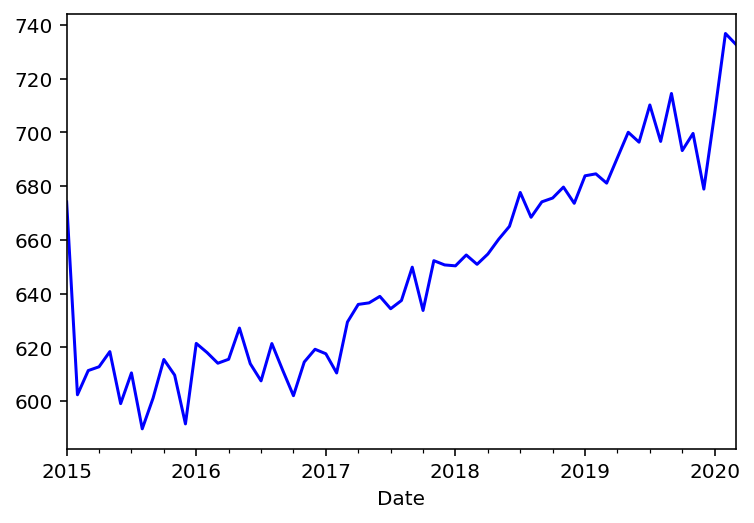

In [35]:
fig, ax = plt.subplots()
df_m.plot(ax=ax, color = 'blue')
plt.show()

In [36]:
result = adfuller(df['ASP'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
# (-40.522068696059186, 0.0, 87, 275501, 
# {'1%': -3.430373736251157, '5%': -2.8615504911247833, '10%': -2.566775584045778}, 6200084.356809139)

ADF Statistic: -24.2139103661795
p-value: 0.0
Critical Values:
	1%: -3.4303754087168254
	5%: -2.8615512303304302
	10%: -2.566775977498725


In [38]:
# take the difference from previous time period
df_stationary = df_dv.diff().dropna()
df_stationary.head()

,ASP
Date,
2020-03-24,-5029.04
2020-03-07,0.00
2020-02-08,0.00
2020-02-07,-549.92
2020-03-20,-88.00


In [39]:
# test
result = adfuller(df_stationary['ASP'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -82.28202084555262
p-value: 0.0
Critical Values:
	1%: -3.4303754088155523
	5%: -2.8615512303740664
	10%: -2.5667759775219507


In [40]:
df_m = df_stationary['ASP'].resample('M').mean()

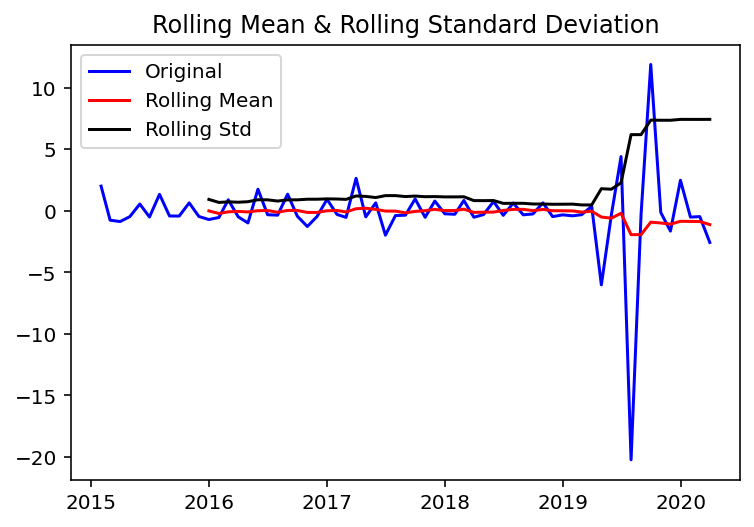

In [41]:
rolling_mean = df_m.rolling(window = 12).mean()
rolling_std = df_m.rolling(window = 12).std()
plt.plot(df_m, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [42]:
# Train data - all data up to the end of 2017
df_train = df_m.loc[:'2017']

# Test data - from 2018
df_test_18 = df_m.loc['2018':'2018']
# df_test_18.head()

# Forecast/Compare/Retrain (all data from 2019)
df_test_19 = df_m.loc['2019':"2019"]
# df_test_19.head()

# Forecast/Compare Q1/ Forecast Q2-Q3 all data from 2020 to present
df_test_20 = df_m.loc['2020':]
# df_test_20.head()

df_train.head()

Date
2015-01-31    2.007516
2015-02-28   -0.762459
2015-03-31   -0.873403
2015-04-30   -0.473059
2015-05-31    0.551778
Freq: M, Name: ASP, dtype: float64

(array([735599., 735719., 735842., 735964., 736085., 736208., 736330.,
        736450., 736573., 736695.]),
 <a list of 10 Text major ticklabel objects>)

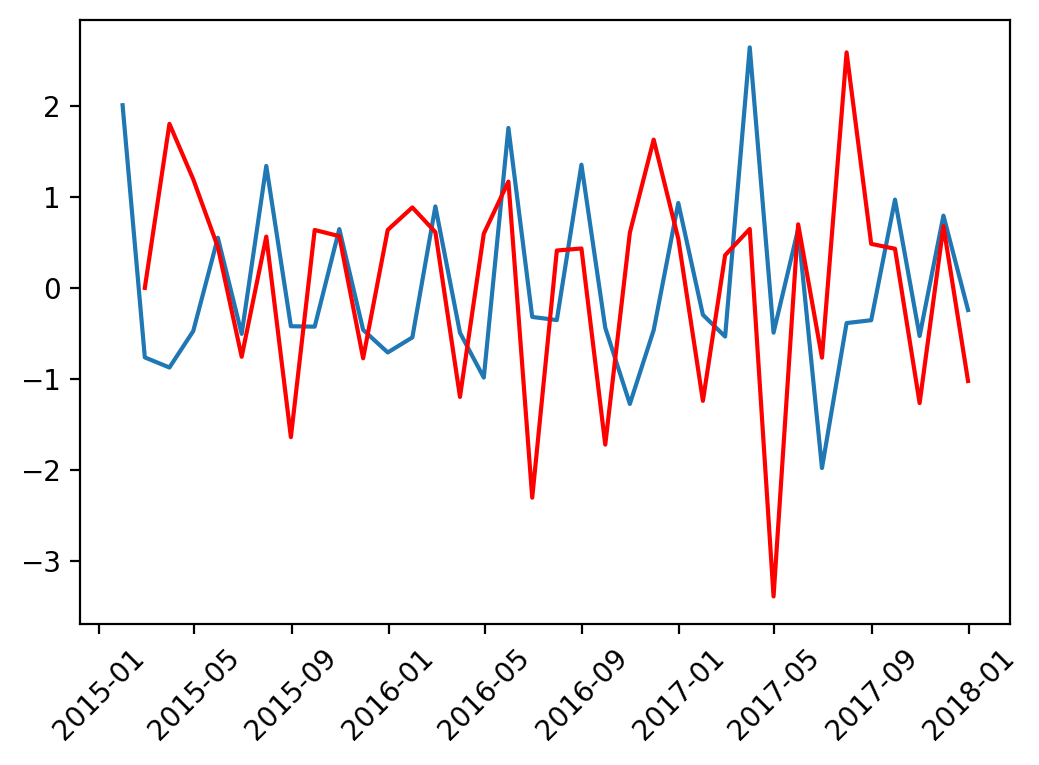

In [43]:
decomposition = seasonal_decompose(df_train) 
model = ARIMA(df_train, order=(1,1,1))
results = model.fit(disp=-1)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(df_train)
plt.plot(results.fittedvalues, color='red')
plt.xticks(rotation=45)

(array([552, 564, 576]), <a list of 3 Text major ticklabel objects>)

<Figure size 600x400 with 0 Axes>

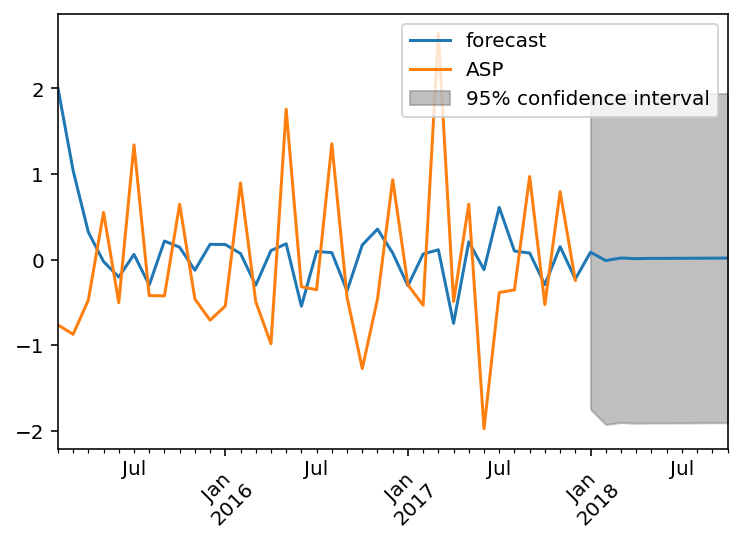

In [44]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_train.iloc[0], index=df_train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(6, 4), dpi=100)
results.plot_predict(1,45)
plt.xticks(rotation=45)

In [45]:
decomposition = seasonal_decompose(df_train) 
model = ARIMA(df_test_18, order=(1,1,1))
results = model.fit(disp=-1)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(df_test_18)
plt.plot(results.fittedvalues, color='red')
plt.xticks(rotation=45)

ValueError: The model specification cannot be estimated. The model contains 7 regressors (0 trend, 0 seasonal, 7 lags) but after adjustment for hold_back and creation of the lags, there are only 4 data points available to estimate parameters.

c:\users\skinnms\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([552, 564]), <a list of 2 Text major ticklabel objects>)

<Figure size 600x400 with 0 Axes>

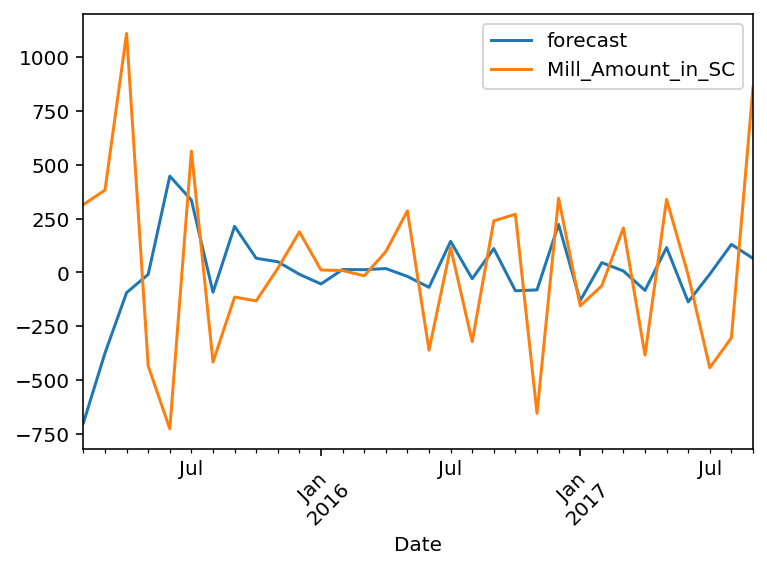

In [17]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_test_18.iloc[0], index=df_test_18.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(6, 4), dpi=100)
results.plot_predict(1,32)
plt.xticks(rotation=45)

In [18]:
decomposition = seasonal_decompose(df_train) 
model = ARIMA(df_test_19, order=(1,1,1))
results = model.fit(disp=-1)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(df_test_19)
plt.plot(results.fittedvalues, color='red')
plt.xticks(rotation=45)

c:\users\skinnms\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


ZeroDivisionError: division by zero

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_test_19.iloc[0], index=df_test_19.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(8, 6), dpi=100)
results.plot_predict(1,20)
plt.xticks(rotation=45)

In [ ]:
# Final Thoughts
# In the domain of machine learning, there is a collection techniques for manipulating and interpreting 
# variables that depend on time. Among these include ARIMA which can remove the trend component in order 
# to accurately predict future values.